# Data Exploration : Cutomer Segmentatiion (clustering)

This code performs customer segmentation using K-means clustering. Here are some comments:

* The code imports the necessary libraries, loads the data, and performs some basic data exploration to understand the data. It also creates a scatter plot to visualize the relationship between satisfaction and loyalty.

* The code then creates a KMeans object and fits the data to it to perform clustering. It also creates a new dataframe with the predicted clusters and plots it to visualize the clustering result.

* The code then scales the input data using the preprocessing module and performs K-means clustering with different numbers of clusters to find the optimal number of clusters based on the Within-Cluster Sum of Squares (WCSS) metric. It also plots the WCSS for each number of clusters to visualize the elbow point.

Finally, the code performs clustering again with the optimal number of clusters and plots the new clusters.

In [40]:
# generalization and summarization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#set the styles to seaborn
sns.set()

#import the KMeans module so we can perforrm k-means clustering with sklearn
from sklearn.cluster import KMeans 

In [41]:
#Load the data & check what's inside 
df=pd.read_csv(r"C:\Users\Asus\Desktop\Portfolio Projects\Python Projects\Marketing_segmentation.csv")
df.columns = df.columns.str.strip()
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [42]:
#Let's inspect your dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [43]:
# get a summary statistics for ur dataset
df.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


Text(0, 0.5, 'Loyalty')

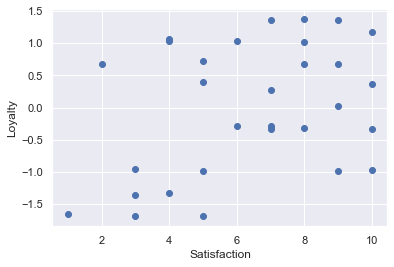

In [44]:
# we are creating a scatter plot of the two variables
plt.scatter(df['Satisfaction'], df['Loyalty'])
#Name your axes:
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [45]:
#Select both features by creating a copy of the dtaa variable
x=df.copy()


# create an object (which we would call Kmeans)
# the number in the brackets is k, or the number of clusters we are aiming for
Kmeans = KMeans(2)

#Fit the data
Kmeans.fit(x)
# to apply clustering

KMeans(n_clusters=2)

In [47]:
# create a copy of the input data
clusters = x.copy()
#take note of the predicted cluseters
clusters['cluster_pred'] = Kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

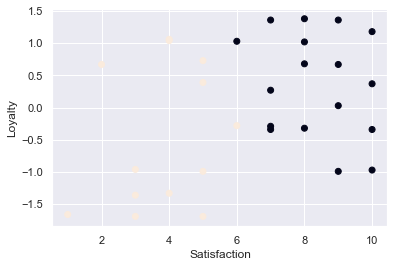

In [48]:
# plot the data using the longitude and the latitude
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [49]:
#import a library which can do that easily
from sklearn import preprocessing


# scale the inputs
# preprocessing.scale scales each variable(column in x) with respect to itself 
#the new result is an array 
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [51]:
#Create an empty list
wcss = []
#create all possible cluster solutions with a loop
# we have chosen to get solutions from 1 to 9 clusters
for i in range(1,10):
    #cluster solution with i clusters
    Kmeans =KMeans(i)
    #Fit the standardized data
    Kmeans.fit(x_scaled)
    #append the WCSS for the iteration
    wcss.append(Kmeans.inertia_)
#Check the result
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.54983679159933,
 5.348079410290979,
 4.395247193896115,
 3.779988616205267]

Text(0, 0.5, 'WCSS')

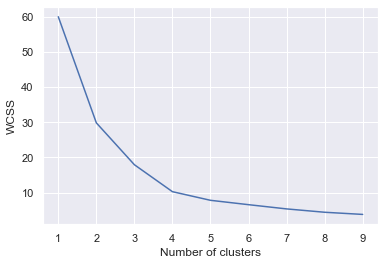

In [54]:
#plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)

#Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [55]:
#Fiddle with k (the number of clusters)
kmeans_new = KMeans (4)

#Fit the data 
kmeans_new.fit(x_scaled)

#create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [59]:
#Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


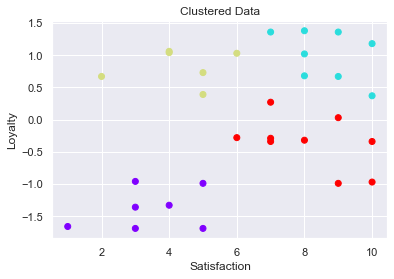

In [63]:
#Plot
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Clustered Data')
plt.show()
# to make classes of data points

To evaluate the clustering result using the silhouette score, we can use the sklearn.metrics.silhouette_score function.

In [64]:
from sklearn.metrics import silhouette_score

# calculate the silhouette score for the clustering result
silhouette_avg = silhouette_score(x_scaled, kmeans_new.labels_)

# print the silhouette score
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.47827714654871856


To perform feature selection or dimensionality reduction before clustering, we can use techniques such as Principal Component Analysis (PCA) or feature selection algorithms from the sklearn.feature_selection module to reduce the number of features:



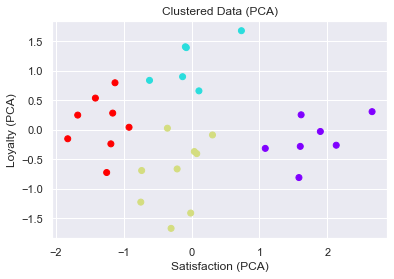

In [65]:
from sklearn.decomposition import PCA

# create a PCA object and fit it to the scaled data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# perform clustering on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(x_pca)

# create a new dataframe with the predicted clusters
clusters_pca = pd.DataFrame({'Satisfaction': x_pca[:, 0], 'Loyalty': x_pca[:, 1], 'cluster_pred': kmeans_pca.labels_})

# plot the clustered data
plt.scatter(clusters_pca['Satisfaction'], clusters_pca['Loyalty'], c=clusters_pca['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction (PCA)')
plt.ylabel('Loyalty (PCA)')
plt.title('Clustered Data (PCA)')
plt.show()


To try different clustering algorithms and compare their results with K-means, we can use algorithms such as Agglomerative Clustering or DBSCAN. 



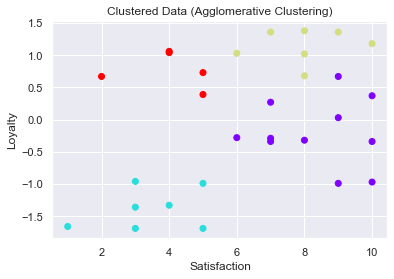

In [66]:
from sklearn.cluster import AgglomerativeClustering

# perform agglomerative clustering on the scaled data
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(x_scaled)

# create a new dataframe with the predicted clusters
clusters_agg = x.copy()
clusters_agg['cluster_pred'] = agg.labels_

# plot the clustered data
plt.scatter(clusters_agg['Satisfaction'], clusters_agg['Loyalty'], c=clusters_agg['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Clustered Data (Agglomerative Clustering)')
plt.show()
